# Random Forest Model 

## Imports

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Data

### Load the Dataset

In [32]:
df1 = pd.read_csv('Preprocessing_pipeline/final_data_sets/train_set_smote.csv')
df2 = pd.read_csv('Preprocessing_pipeline/final_data_sets/test_set.csv')

df = pd.concat([df1, df2], ignore_index=True)
df.drop(['Sex', 'Q8'], axis=1, inplace=True)




In [33]:
print("Shape of the data set: ", df.shape)

Shape of the data set:  (771, 22)


## 2. One-hot encoding

### Define the variables for one-hot encode

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  771 non-null    int64
 1   Relationship Status  771 non-null    int64
 2   Occupation           771 non-null    int64
 3   Social Media User?   771 non-null    int64
 4   Time Spent           771 non-null    int64
 5   Q1                   771 non-null    int64
 6   Q2                   771 non-null    int64
 7   Q3                   771 non-null    int64
 8   Q4                   771 non-null    int64
 9   Q5                   771 non-null    int64
 10  Q6                   771 non-null    int64
 11  Q7                   771 non-null    int64
 12  Facebook             771 non-null    int64
 13  Instagram            771 non-null    int64
 14  YouTube              771 non-null    int64
 15  Snapchat             771 non-null    int64
 16  Twitter              771 n

In [35]:
# Initialize the list of categorical variables
cat_variables = []

# Loop through the dataframe columns (ignoring the first one)
for col in df.columns[1:]:
    # Check if the column is of object type (categorical) and has more than 2 unique values
    if col == 'Difficulty_level':
        continue
    elif df[col].nunique() > 2:
        cat_variables.append(col)

print(cat_variables)

['Relationship Status', 'Occupation', 'Time Spent', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']


### Apply pandas pd.get_dummies function to one-hot encode

- data: data frame(data)
- prefix: A list of prefixes(cat_variables)
- columns: A list of columns that will be one hot encoded(cat_variables)

### Shape of the dataset now


In [36]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
features = pd.get_dummies(data = df, prefix=cat_variables, columns=cat_variables)

features.head()

# How many coluns now
print("Number of columns after one-hot encoding before encode 'platforms used?': ", len(features.columns))

Number of columns after one-hot encoding before encode 'platforms used?':  61


In [37]:
features.head()

,Age,Social Media User?,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,Difficulty_level,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5
0,24,1,1,1,1,0,1,0,0,0,0,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
1,46,1,1,0,1,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,30,1,1,1,0,0,0,0,0,0,0,1,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,1,0,0,1,0,0,0,0,0,0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
4,19,1,1,1,1,0,0,0,0,0,1,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False


### Make Every feature True or False

In [38]:
# List of social media features to be converted
binary_features = [
    'Social Media User?', 'Facebook', 'Instagram', 'YouTube',
    'Snapchat', 'Twitter', 'Discord', 'Reddit', 'Pinterest', 'TikTok'
]

# Convert 'Yes' to True and 'No' to False only if the column exists in the dataframe
for feature in binary_features:
    if feature in features.columns:
        features[feature] = features[feature].replace({1: True, 0: False})

# Display the first few rows of the dataframe
features.head()

/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_32571/3132694753.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features[feature] = features[feature].replace({1: True, 0: False})


,Age,Social Media User?,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,Difficulty_level,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5
0,24,True,True,True,True,False,True,False,False,False,False,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
1,46,True,True,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,30,True,True,True,False,False,False,False,False,False,False,1,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,True,False,False,True,False,False,False,False,False,False,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
4,19,True,True,True,True,False,False,False,False,False,True,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False


### Removing target from the features

In [39]:
features.drop('Difficulty_level', axis=1, inplace=True)
print(features.shape)

(771, 60)


### Table to clarify every feature is a binary variable other than "Age"


In [40]:
# Initialize lists to hold the table data
feature_index_new = []
feature_name_new = []
categories_new = []
num_categories_new = []

# Iterate over each column to extract the required information
for idx, col in enumerate(features.columns):
    
    unique_categories = features[col].unique()
    feature_index_new.append(idx)
    feature_name_new.append(col)
    # if col == 'Platforms Used':
    #     categories_new.append(", ".join(map(str, social_media_platforms)))
    # else:
    categories_new.append(", ".join(map(str, unique_categories)))
    # if col == 'Platforms Used':
    #     num_categories_new.append(len(social_media_platforms))
    #else:
    num_categories_new.append(len(unique_categories))

# Create the resulting DataFrame
table_for_num_of_categories_new = pd.DataFrame({
    'Feature Index': feature_index_new,
    'Feature': feature_name_new,
    'Categories': categories_new,
    'Number of Categories': num_categories_new
})

# Display the DataFrame using the display function
from IPython.display import display

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(table_for_num_of_categories_new)

,Feature Index,Feature,Categories,Number of Categories
0,0,Age,"24, 46, 30, 56, 19, 21, 47, 23, 20, 25, 26, 65, 52, 35, 22, 44, 17, 60, 34, 48, 27, 36, 29, 32, 18, 42, 31, 50, 37, 69, 28, 14, 16, 43, 38, 40, 91, 51, 49, 15, 55, 13, 33, 53, 54, 59, 58, 74, 90, 83, 45",51
1,1,Social Media User?,"True, False",2
2,2,Facebook,"True, False",2
3,3,Instagram,"True, False",2
4,4,YouTube,"True, False",2
5,5,Snapchat,"False, True",2
6,6,Twitter,"True, False",2
7,7,Discord,"False, True",2
8,8,Reddit,"False, True",2
9,9,Pinterest,"False, True",2


### Number of features after one-hot encoded

In [41]:
numer_of_features_after_one_hot_encoded = len(features.columns)

print("Number of columns after one-hot encoded: ", numer_of_features_after_one_hot_encoded)

# Feature
features.head() 

# For check the data frame still preserved
#data.head()

Number of columns after one-hot encoded:  60


,Age,Social Media User?,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5
0,24,True,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False
1,46,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,30,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
4,19,True,True,True,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False


## 3. Making train and test sets

In [42]:
RANDOM_STATE = 55

X_train = features.iloc[0: df1.shape[0]]
X_test = features.iloc[df1.shape[0]: df.shape[0]].reset_index(drop=True)
y_train = df['Difficulty_level'].iloc[0: df1.shape[0]]
y_test = df['Difficulty_level'].iloc[df1.shape[0]: df.shape[0]].reset_index(drop=True)

In [43]:
# printing number of samples in each set
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')

train samples: 675
validation samples: 96


## 4. Building the Models



In [44]:
from sklearn.metrics import accuracy_score

### Function for plot graphs

    

In [45]:
def plot_graphs(accuracy_list_train, accuracy_list_test, hyperparameter_list, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.plot(hyperparameter_list, accuracy_list_train, marker='o', label='On training set')
    plt.plot(hyperparameter_list, accuracy_list_test, marker='o', label='On test set')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=hyperparameter_list)

    # Find the maximum accuracy and corresponding min_samples_split value for both curves
    max_accuracy_train = max(accuracy_list_train)
    max_accuracy_train_index = accuracy_list_train.index(max_accuracy_train)
    max_accuracy_train_value = hyperparameter_list[max_accuracy_train_index]

    max_accuracy_test = max(accuracy_list_test)
    max_accuracy_test_index = accuracy_list_test.index(max_accuracy_test)
    max_accuracy_test_value = hyperparameter_list[max_accuracy_test_index]

    # Highlight and annotate the highest points on the training set curve
    plt.scatter(max_accuracy_train_value, max_accuracy_train, color='blue')
    plt.annotate(f'{max_accuracy_train_value}, {max_accuracy_train:.2f}', 
                xy=(max_accuracy_train_value, max_accuracy_train), 
                xytext=(max_accuracy_train_value, max_accuracy_train + 0.03),
                ha='center', color='blue',
                arrowprops=dict(facecolor='blue', shrink=0.05))

    # Highlight and annotate the highest points on the test set curve
    plt.scatter(max_accuracy_test_value, max_accuracy_test, color='orange', zorder=5)
    plt.annotate(f'{max_accuracy_test_value}, {max_accuracy_test:.2f}', 
                xy=(max_accuracy_test_value, max_accuracy_test), 
                xytext=(max_accuracy_test_value, max_accuracy_test + 0.03),
                ha='center', color='orange',
                arrowprops=dict(facecolor='orange', shrink=0.05))

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)

    # Show the legend and plot
    plt.legend()
    
    plt.show()
    
    return max_accuracy_test_value

## 4.2 Random Forest

### Hyperparameters of random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

print("Number of hyperparameters in RandomForestClassifier: ", len(RandomForestClassifier().get_params()))
for item in (RandomForestClassifier().get_params()):
    print(item)

Number of hyperparameters in RandomForestClassifier:  19
bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


### Hyper parameter tuning

### 1. bootstrap: If True, bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree.

Reasonable values: True (default) or False

### 2. ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. This parameter controls the trade-off between the complexity of the tree and its ability to generalize to unseen data.

Reasonable values: 0.0 to 0.1


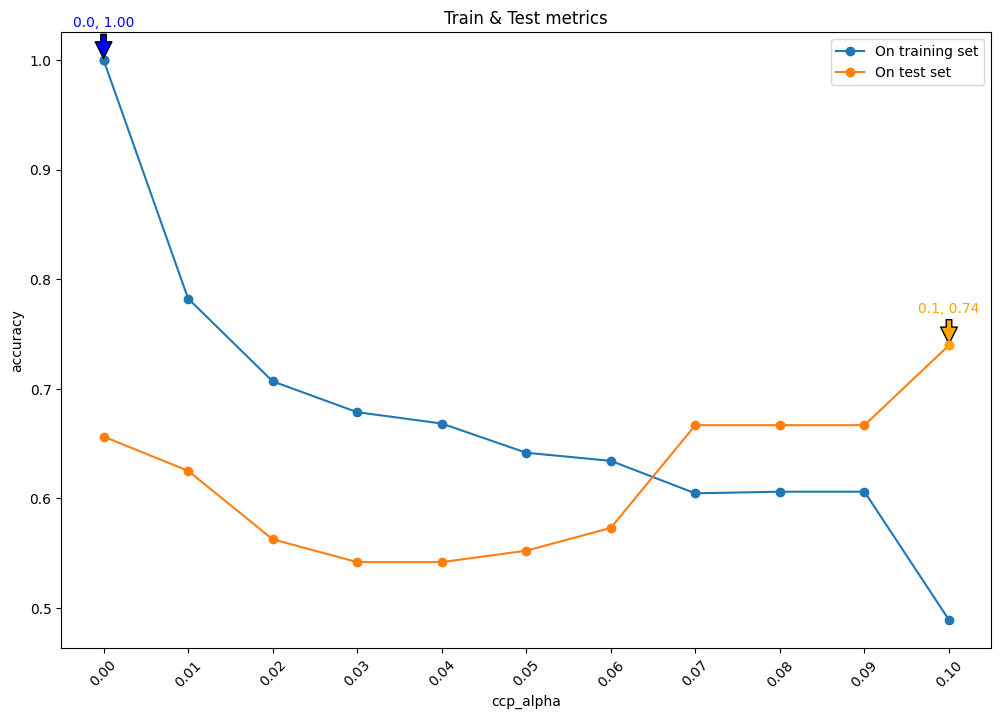

Best ccp_alpha value:  0.1


In [47]:
ccp_alpha_list = [0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.00]
accuracy_list_train = []
accuracy_list_test = []
for ccp_alpha in ccp_alpha_list:
    model = RandomForestClassifier(ccp_alpha = ccp_alpha,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

ccp_alpha = plot_graphs(accuracy_list_train, accuracy_list_test, ccp_alpha_list[:], 'Train & Test metrics', 'ccp_alpha', 'accuracy', )
print("Best ccp_alpha value: ", ccp_alpha)


### 3. class_weight: Weights associated with classes. It can be used to handle class imbalance.

Reasonable values: None (default), balanced, or a dictionary specifying weights for each class

### 4. criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

Reasonable values: gini (default) or entropy

### 5. max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Reasonable values: None (default) or an integer between 5 and 15

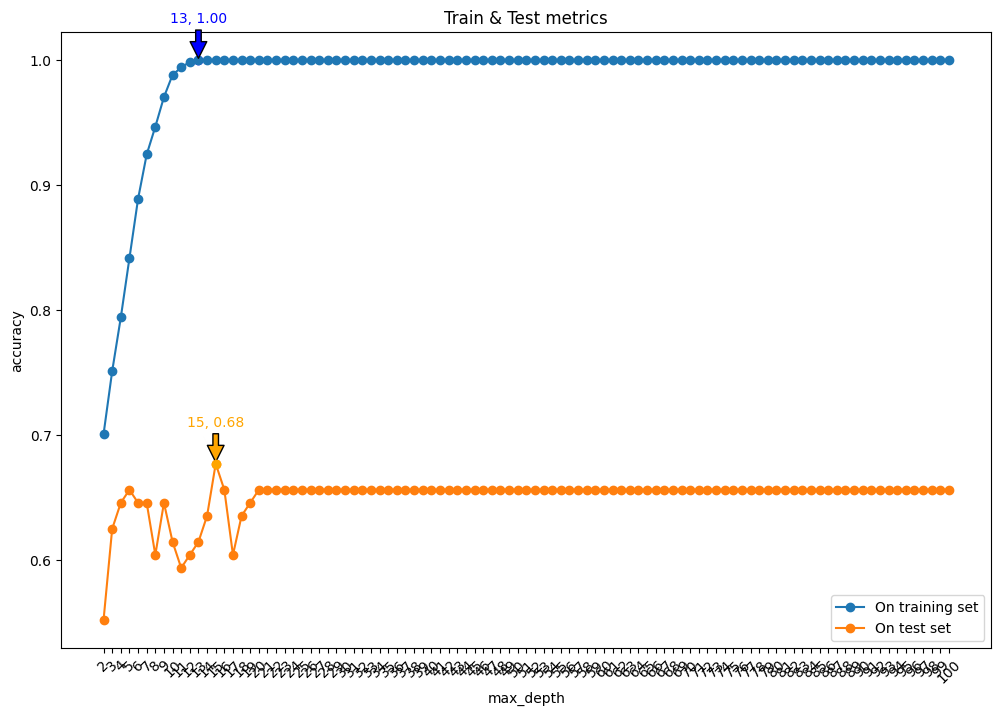

Best max_depth value:  15


In [48]:
max_depth_list = [i for i in range(2, 101)] 
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

max_depth = plot_graphs(accuracy_list_train, accuracy_list_test, max_depth_list, 'Train & Test metrics', 'max_depth', 'accuracy', )
print("Best max_depth value: ", max_depth)

### 6. max_features: The number of features to consider when looking for the best split.

Reasonable values: auto (default), sqrt, log2, or an integer between 1 and 65

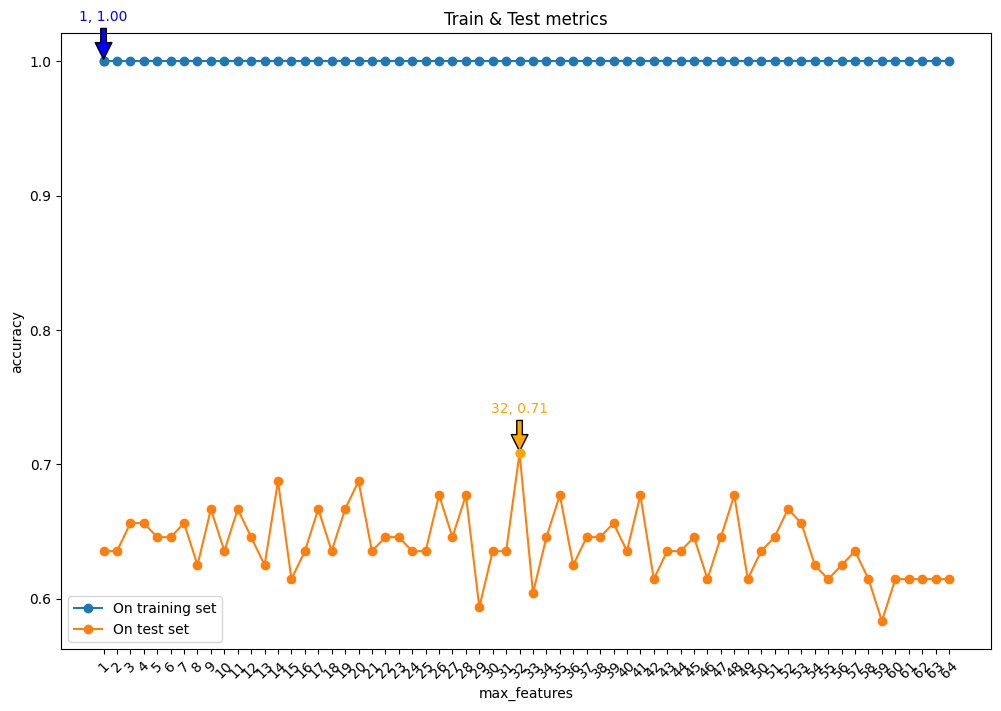

Best max_features value:  32


In [49]:
max_features_list = [i for i in range(1, 65)] 
accuracy_list_train = []
accuracy_list_test = []
for max_features in max_features_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_features = max_features,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

max_features = plot_graphs(accuracy_list_train, accuracy_list_test, max_features_list, 'Train & Test metrics', 'max_features', 'accuracy', )
print("Best max_features value: ", max_features)

### 7. max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

Reasonable values: None (default) or an integer between 10 and 100

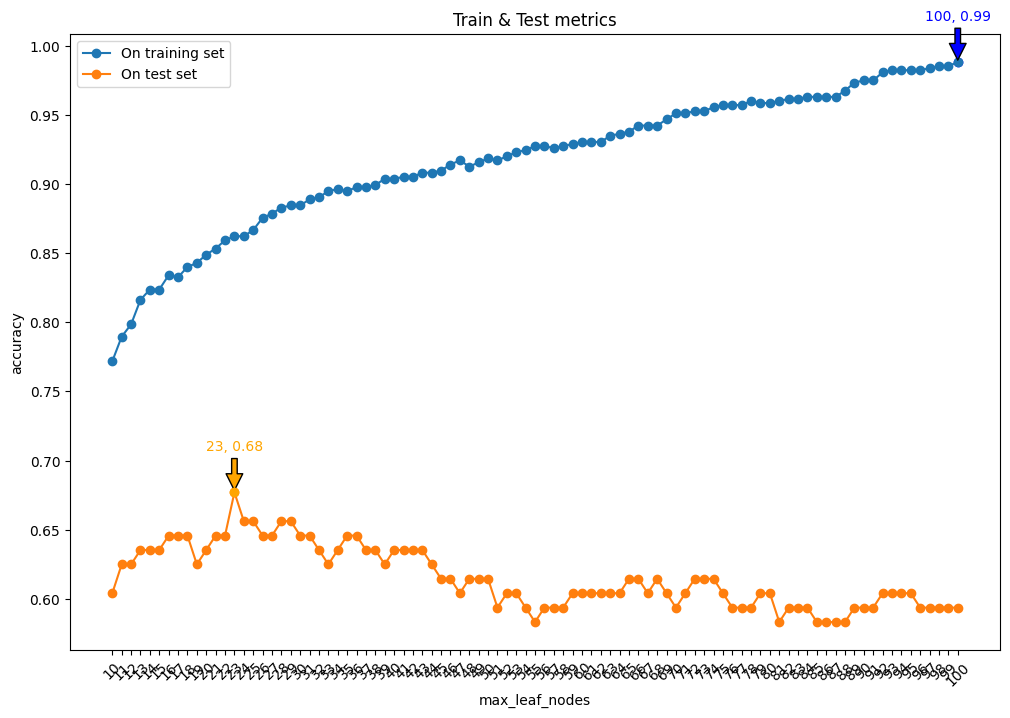

Best max_leaf_nodes value:  23


In [50]:
max_leaf_nodes_list = [i for i in range(10, 101)] 
accuracy_list_train = []
accuracy_list_test = []
for max_leaf_nodes in max_leaf_nodes_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

max_leaf_nodes = plot_graphs(accuracy_list_train, accuracy_list_test, max_leaf_nodes_list, 'Train & Test metrics', 'max_leaf_nodes', 'accuracy', )
print("Best max_leaf_nodes value: ", max_leaf_nodes)

### 8. max_samples: The number of samples to draw from X to train each base estimator. If None, then draw X.shape[0] samples.

Reasonable values: None (default) or a float between 0.1 and 1.0

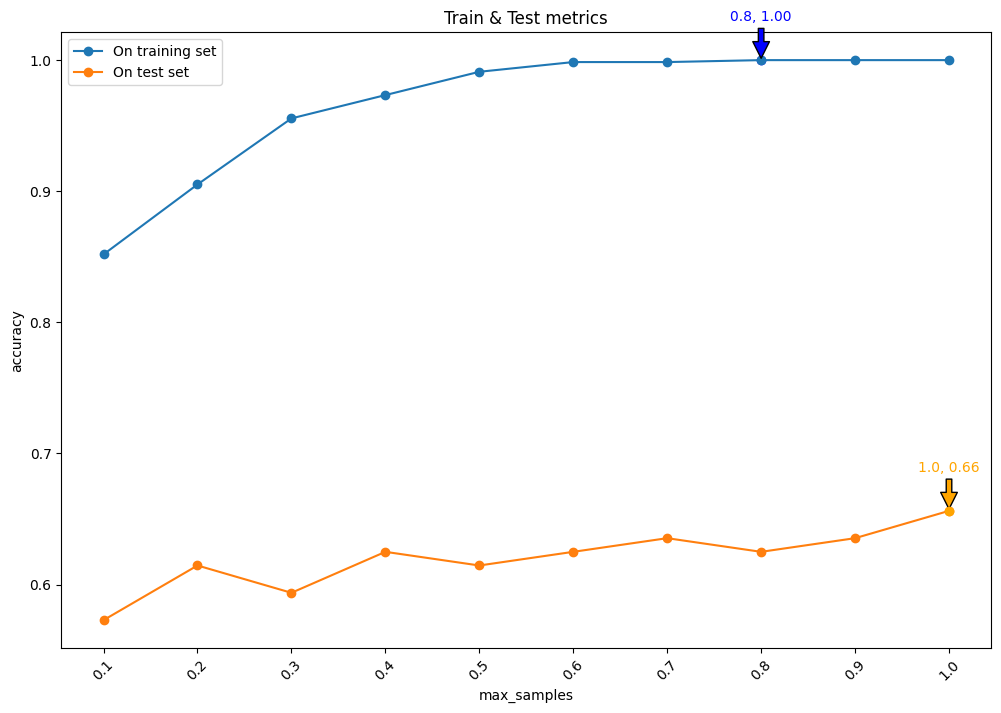

Best max_samples value:  1.0


In [51]:
max_samples_list = [i for i in np.arange(0.1, 1.1, 0.1)] 
accuracy_list_train = []
accuracy_list_test = []
for max_samples in max_samples_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_samples = max_samples,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

max_samples = plot_graphs(accuracy_list_train, accuracy_list_test, max_samples_list, 'Train & Test metrics', 'max_samples', 'accuracy', )
print("Best max_samples value: ", max_samples)

### 9. min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Reasonable values: 0.0 (default) to 0.1

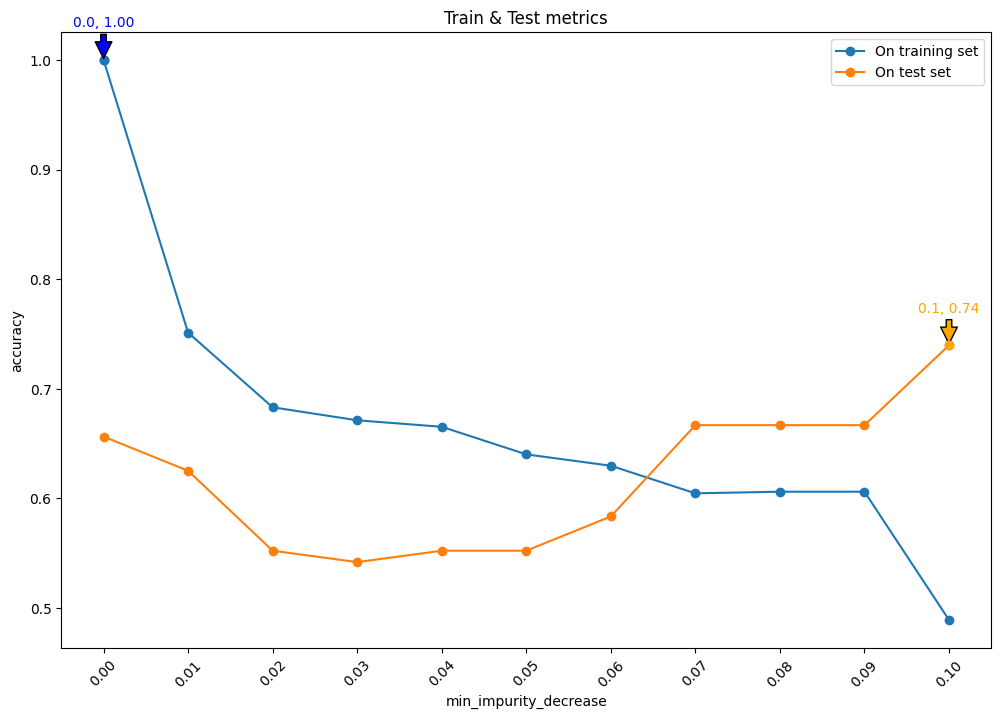

Best min_impurity_decrease value:  0.1


In [52]:
min_impurity_decrease_list = [i for i in np.arange(0.00, 0.11, 0.01)] 
accuracy_list_train = []
accuracy_list_test = []
for min_impurity_decrease in min_impurity_decrease_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_impurity_decrease = min_impurity_decrease,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

min_impurity_decrease = plot_graphs(accuracy_list_train, accuracy_list_test, min_impurity_decrease_list, 'Train & Test metrics', 'min_impurity_decrease', 'accuracy', )
print("Best min_impurity_decrease value: ", min_impurity_decrease)

### 10. min_samples_leaf: The minimum number of samples required to be at a leaf node.

Reasonable values: 1 (default) to 10

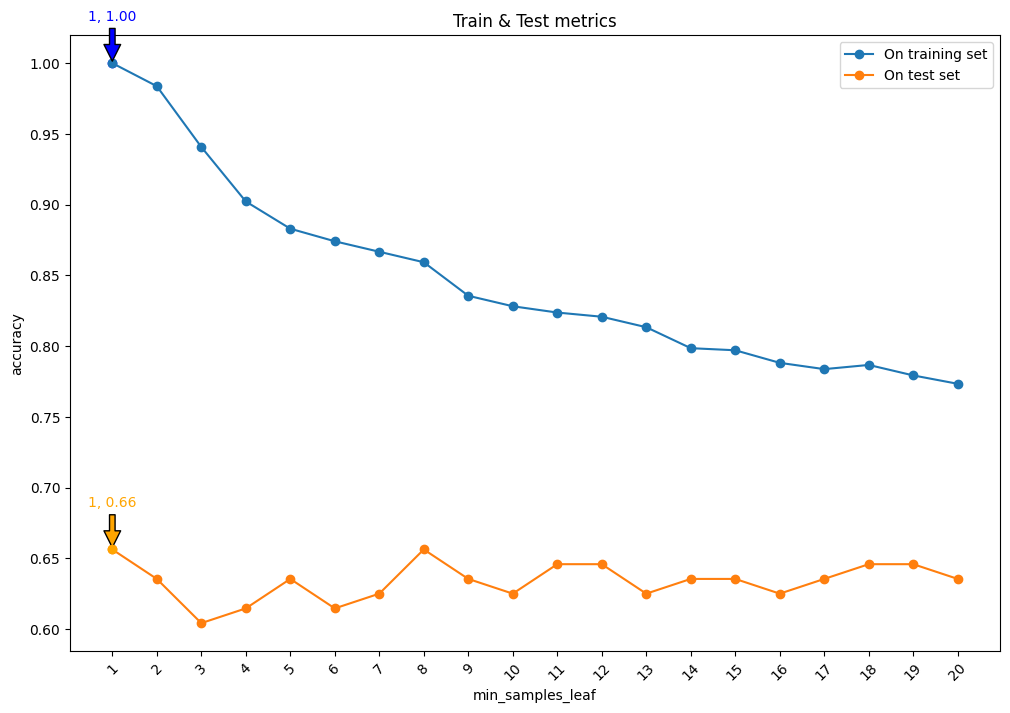

Best min_samples_leaf value:  1


In [53]:
min_samples_leaf_list = [i for i in range(1, 21)] 
accuracy_list_train = []
accuracy_list_test = []
for min_samples_leaf in min_samples_leaf_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

min_samples_leaf = plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_leaf_list, 'Train & Test metrics', 'min_samples_leaf', 'accuracy', )
print("Best min_samples_leaf value: ", min_samples_leaf)


### 11. min_samples_split: The minimum number of samples required to split an internal node.

Reasonable values: 2 (default) to 10

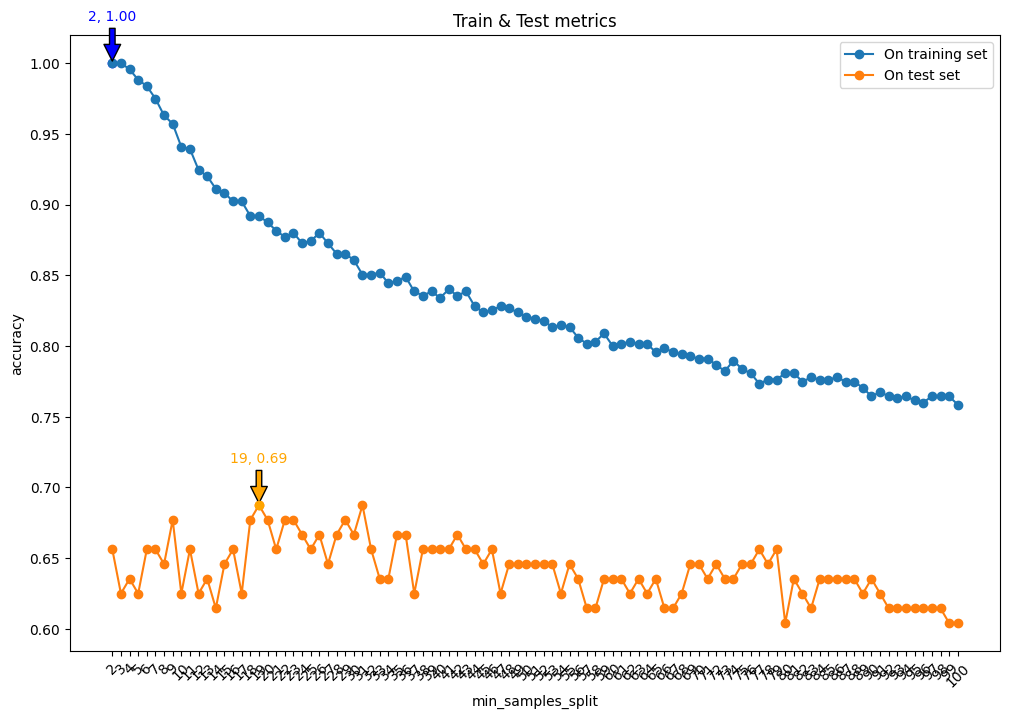

Best min_samples_split value:  19


In [54]:
min_samples_split_list = [i for i in range(2, 101)]
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

min_samples_split = plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_split_list[:], 'Train & Test metrics', 'min_samples_split', 'accuracy', )
print("Best min_samples_split value: ", min_samples_split)

### 12. min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

Reasonable values: 0.0 (default) to 0.1

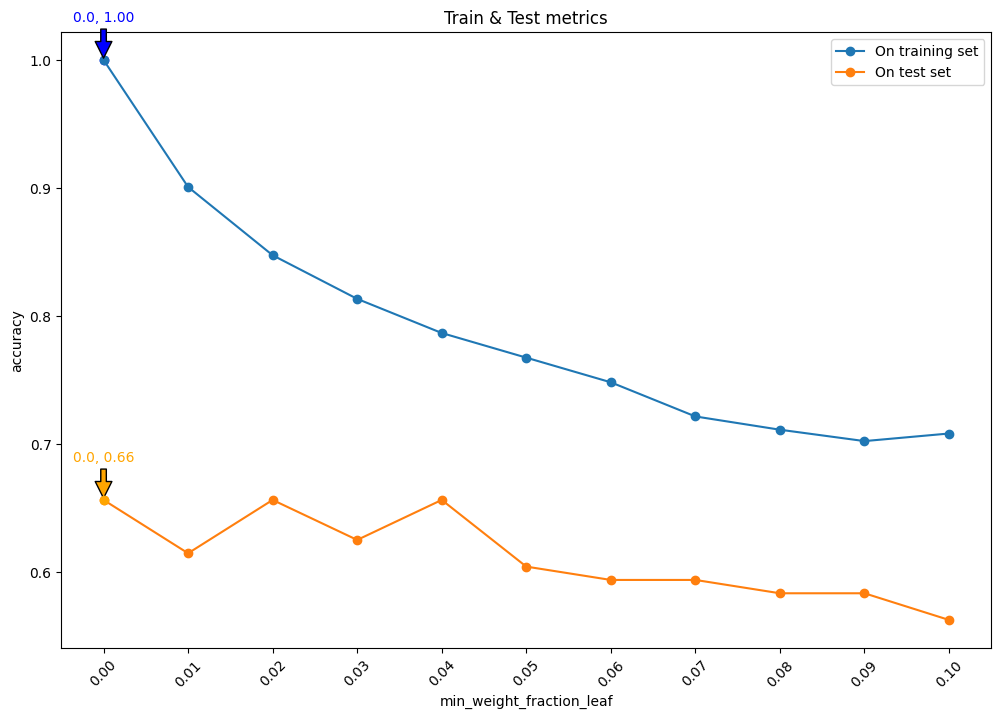

Best min_weight_fraction_leaf value:  0.0


In [55]:
min_weight_fraction_leaf_list = [i for i in np.arange(0.00, 0.11, 0.01)]
accuracy_list_train = []
accuracy_list_test = []
for min_weight_fraction_leaf in min_weight_fraction_leaf_list:
    model = RandomForestClassifier(min_weight_fraction_leaf = min_weight_fraction_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

min_weight_fraction_leaf = plot_graphs(accuracy_list_train, accuracy_list_test, min_weight_fraction_leaf_list[:], 'Train & Test metrics', 'min_weight_fraction_leaf', 'accuracy', )
print("Best min_weight_fraction_leaf value: ", min_weight_fraction_leaf)

### 13. monotonic_cst: Monotonic constraint to ensure certain features always increase or decrease the output.

Reasonable values: Generally None for most cases

### 14. n_estimators: The number of trees in the forest.

Reasonable values: 10 to 100 (default is 100)


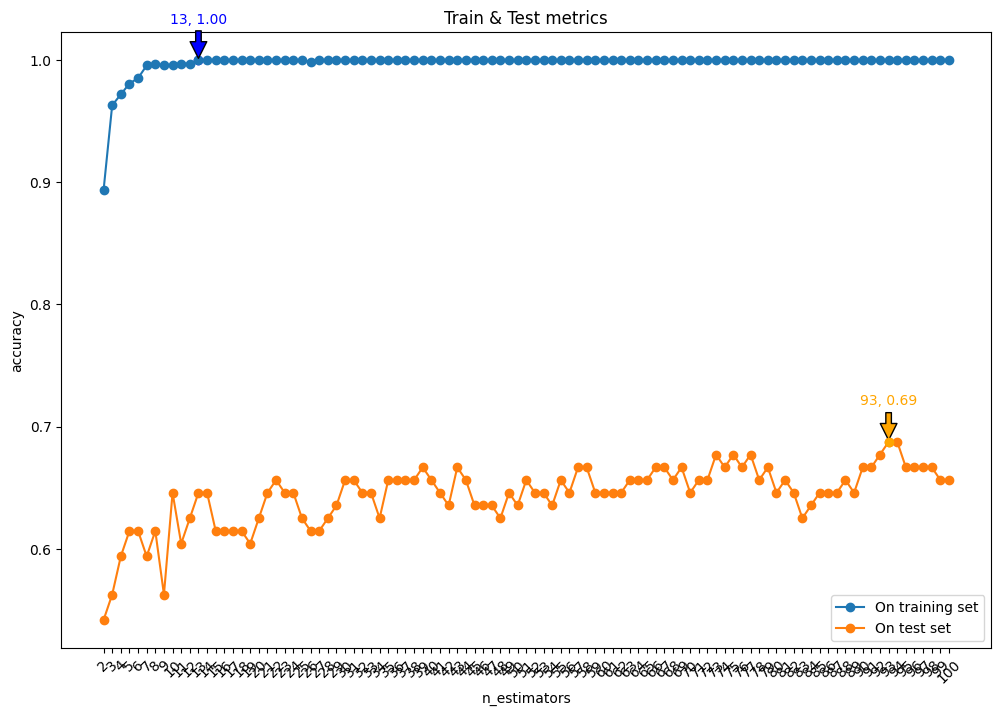

Best n_estimators value:  93


In [56]:
n_estimators_list = [i for i in range(2, 101)]
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

n_estimators = plot_graphs(accuracy_list_train, accuracy_list_test, n_estimators_list, 'Train & Test metrics', 'n_estimators', 'accuracy', )
print("Best n_estimators value: ", n_estimators)

### 15. n_jobs: The number of jobs to run in parallel. -1 means using all processors.

Reasonable values: 1 (default), or -1

### 16. oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

Reasonable values: False (default) or True


### 17. random_state: Controls the randomness of the estimator. Pass an integer for reproducible results across multiple function calls.

Reasonable values: None (default) or an integer


### 18. verbose: Controls the verbosity of the tree building process.

Reasonable values: 0 (default) to 3

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


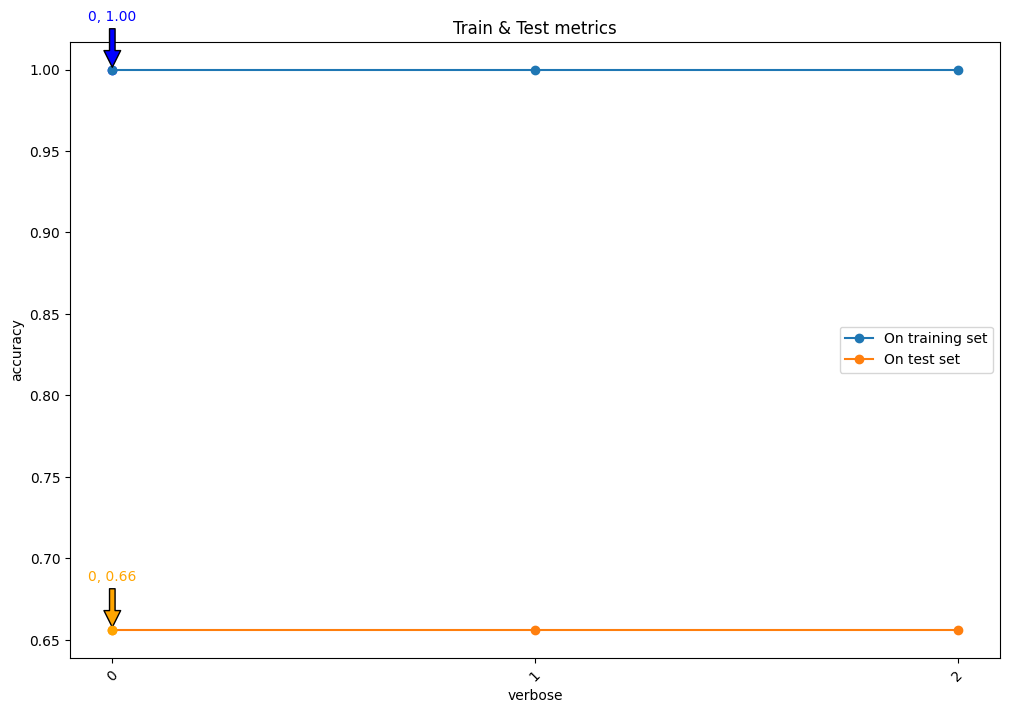

Best verbose value:  0


In [57]:
verbose_list = [i for i in range(0, 3)]
accuracy_list_train = []
accuracy_list_test = []
for verbose in verbose_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(verbose = verbose,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

verbose = plot_graphs(accuracy_list_train, accuracy_list_test, verbose_list, 'Train & Test metrics', 'verbose', 'accuracy', )
print("Best verbose value: ", verbose)

### 19. warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble.

Reasonable values: False (default) or True

# Regularization

1. Limiting Tree Depth
   - Hyperparameter: max_depth
   - Effect: Restricts the maximum depth of each decision tree in the forest.
   - Benefit: Reduces the complexity of individual trees, preventing them from overfitting the training data.
  
2. Minimum Samples for Splitting and Leaf Nodes
   - Hyperparameters: min_samples_split and min_samples_leaf
   - Effect: Controls the minimum number of samples required to split a node and to be at a leaf node.
   - Benefit: Ensures that nodes are not split too finely, which helps in reducing overfitting.
  
3. Maximum Number of Features
   - Hyperparameter: max_features
   - Effect: Limits the number of features considered for splitting at each node.
   - Benefit: Reduces the variance of the model by introducing randomness and reducing the correlation between individual trees.

4. Pruning
   - Hyperparameter: ccp_alpha
   - Effect: Applies cost-complexity pruning to remove nodes that provide little predictive power.
   - Benefit: Simplifies trees by removing branches that have little importance, thus reducing overfitting.
  
5. Using Bootstrapping
   - Hyperparameter: bootstrap
   - Effect: Uses bootstrapped samples (random sampling with replacement) to train each tree.
   - Benefit: Adds diversity to the individual trees, which reduces the variance of the model.

6. Controlling Tree Count
   - Hyperparameter: n_estimators
   - Effect: Sets the number of trees in the forest.
   - Benefit: Increasing the number of trees generally improves performance, but it also increases computation time. Finding the right balance is key.

7. Out-of-Bag (OOB) Error Estimation
   - Hyperparameter: oob_score
   - Effect: Uses out-of-bag samples to estimate the generalization error.
   - Benefit: Provides a way to validate the model without requiring a separate validation set, helping in assessing and preventing overfitting.

### Try all the combinations using GridSearchCV

In [58]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'bootstrap': [True, False],
#     'ccp_alpha': [i for i in np.arange(0.000, 0.030, 0.005)],
#     'lass_weight': ['None', 'balanced', 'balanced_subsample'],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(5, 15)],
#     'max_features': [i for i in range(8, 15)],
#     'max_leaf_nodes': [i for i in range(27, 35)],
#     'max_samples': [i for i in np.arange(0.10, 1.10, 0.01)],
#     'min_impurity_decrease': [i for i in np.arange(0.000, 0.020, 0.005)],
#     'min_samples_leaf': [i for i in range(3, 18)],
#     'min_samples_split': [i for i in range(2, 17)],
#     'min_weight_fraction_leaf': [i for i in np.arange(0.000, 0.030, 0.005)],
#     'monotonic_cst': ['None'],
#     'n_estimators': [i for i in range(17, 27)],
#     'n_jobs': [1, -1],
#     'oob_score': [False, True],
#     'random_state': [RANDOM_STATE],
#     'verbose': [0],
#     'warm_start': [False, True],
# }

# # Initialize the RandomForestClassifier
# model = RandomForestClassifier(random_state=RANDOM_STATE)

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best score
# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print(f"Best accuracy: {best_accuracy}")
# print(f"Best parameters: {best_params}")

# bootstrap = best_params['bootstrap']
# ccp_alpha = best_params['ccp_alpha']
# class_weight = best_params['class_weight']
# criterion = best_params['criterion']
# max_depth = best_params['max_depth']
# max_features = best_params['max_features']
# max_leaf_nodes = best_params['max_leaf_nodes']
# max_samples = best_params['max_samples']
# min_impurity_decrease = best_params['min_impurity_decrease']
# min_samples_leaf = best_params['min_samples_leaf']
# min_samples_split = best_params['min_samples_split']
# min_weight_fraction_leaf = best_params['min_weight_fraction_leaf']
# monotonic_cst = best_params['monotonic_cst']
# n_estimators = best_params['n_estimators']
# n_jobs = best_params['n_jobs']
# oob_score = best_params['oob_score']
# random_state = best_params['random_state']
# verbose = best_params['verbose']
# warm_start = best_params['warm_start']

## Optimal hyperparameter values

In [59]:
print("Best parameters: ")
print("ccp_alpha: ", ccp_alpha)
print("max_depth: ", max_depth)
print("max_features: ", max_features)
print("max_leaf_nodes: ", max_leaf_nodes)
print("max_samples: ", max_samples)
print("min_impurity_decrease: ", min_impurity_decrease)
print("min_samples_leaf: ", min_samples_leaf)
print("min_samples_split: ", min_samples_split)
print("min_weight_fraction_leaf: ", min_weight_fraction_leaf)
print("n_estimators: ", n_estimators)
print("verbose: ", verbose)

Best parameters: 
ccp_alpha:  0.1
max_depth:  15
max_features:  32
max_leaf_nodes:  23
max_samples:  1.0
min_impurity_decrease:  0.1
min_samples_leaf:  1
min_samples_split:  19
min_weight_fraction_leaf:  0.0
n_estimators:  93
verbose:  0


# Grid secrching

## Grid search 1

In [60]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'bootstrap': True, 
#     'ccp_alpha': ccp_alpha,
#     'class_weight': 'balanced',
#     'criterion': 'entropy',
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'max_leaf_nodes': max_leaf_nodes,
#     'max_samples': max_samples,
#     'min_impurity_decrease': min_impurity_decrease,
#     'min_samples_leaf': min_samples_leaf,
#     'min_samples_split': min_samples_split,
#     'min_weight_fraction_leaf': min_weight_fraction_leaf,
#     'monotonic_cst': None,
#     'n_estimators': n_estimators,
#     'n_jobs': 1,
#     'oob_score': True,
#     'random_state': RANDOM_STATE,
#     'verbose': verbose,
#     'warm_start': True
# }

# # Initialize the RandomForestClassifier
# model = RandomForestClassifier(random_state=RANDOM_STATE)

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best score
# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print(f"Best accuracy: {best_accuracy}")
# print(f"Best parameters: {best_params}")

### The parameter dictionary

In [61]:
params = {
    'bootstrap': True, 
    'ccp_alpha': ccp_alpha,
    'class_weight': None,
    'criterion': 'entropy',
    'max_depth': max_depth,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes,
    'max_samples': max_samples,
    'min_impurity_decrease': min_impurity_decrease,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'monotonic_cst': None,
    'n_estimators': n_estimators,
    'n_jobs': 1,
    'oob_score': True,
    'random_state': RANDOM_STATE,
    'verbose': verbose,
    'warm_start': True
}

### Use values for "max_depth", "min_samples_split", "n_estimators" which gave the best results for the test set

- max_depth = 10
- min_samples_split = 7
- n_estimators = 20

In [62]:
random_forest_model = RandomForestClassifier(**params).fit(X_train,y_train)


In [63]:
training_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_train),y_train)
testing_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_random_forest:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_random_forest:.4f}")

Training Accuracy score: 0.6059
Testing Accuracy score: 0.6667


Scikit Learn random forest implementation gives the best accuracy for now. These models should imrove more. For now I'm gonna compare Scikit Learn Random Forest implementation performances with other models.

## 6. Get the performance Metrics for the Scikit Learn Random Forest Implementation

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        18
           1       0.85      0.67      0.75        66
           2       0.30      0.50      0.38        12

    accuracy                           0.67        96
   macro avg       0.58      0.65      0.60        96
weighted avg       0.73      0.67      0.68        96

<class 'numpy.ndarray'>


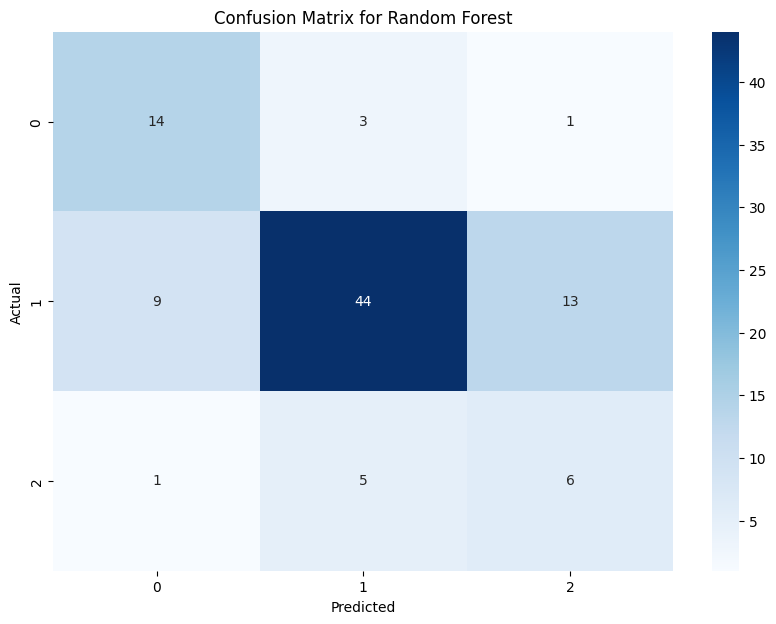

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(features, data['Difficulty_level'], train_size=0.8, random_state=RANDOM_STATE)  # 80% training and 20% testing

y_pred = random_forest_model.predict(X_test)


report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(type(cm))

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.savefig('confusion_matrix.png')
plt.show()

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example: Compute macro-average precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Example: Compute weighted-average precision, recall, and F1-score
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Macro-average precision: {macro_precision:.4f}')
print(f'Macro-average recall: {macro_recall:.4f}')
print(f'Macro-average F1-score: {macro_f1:.4f}')
print()
print(f'Weighted-average precision: {weighted_precision:.4f}')
print(f'Weighted-average recall: {weighted_recall:.4f}')
print(f'Weighted-average F1-score: {weighted_f1:.4f}')


Macro-average precision: 0.5765
Macro-average recall: 0.6481
Macro-average F1-score: 0.5958

Weighted-average precision: 0.7286
Weighted-average recall: 0.6667
Weighted-average F1-score: 0.6846


# ML Flow

### Setting Up the Experiment

In [66]:
# import mlflow

# # Set the experiment name
# experiment_name = "My ML Experiment"
# mlflow.set_experiment(experiment_name)


### Running and Logging an Experiment

In [67]:
# import mlflow.sklearn

# def train_and_log_model(params, run_name, model_name):
#     with mlflow.start_run(run_name=run_name):
        
#         metrics = {
#             "Training accuracy": training_accuracy_score_random_forest,
#             "Testing accuracy": testing_accuracy_score_random_forest,
#             "Macro-average precision": macro_precision,
#             "Macro-average recall": macro_recall,
#             "Macro-average F1-score": macro_f1,
#             "Weighted-average precision": weighted_precision,
#             "Weighted-average recall": weighted_recall,
#             "Weighted-average F1-score": weighted_f1
#         }
        
#         # Save the classification report to a file and log it as an artifact
#         report_file = "classification_report.txt"
#         with open(report_file, "w") as f:
#             f.write(report)
            
#         # Confusion matrix
#         cm_file = "confusion_matrix.png"
        
#         # Log parameters, metrics, artifacts and model
#         mlflow.log_params(params)
#         mlflow.log_metrics(metrics)
#         mlflow.log_artifact(report_file, artifact_path="reports")
#         mlflow.log_artifact(cm_file, artifact_path="reports")
#         mlflow.sklearn.log_model(random_forest_model, "model")
        
#         # Register the model in MLflow
#         mlflow.sklearn.log_model(random_forest_model, model_name)

### Run the experiment

In [68]:
# train_and_log_model(params, 'Smote_boarderline_2_without_Sex_Q8', 'RF_Smote_boarderline_2_without_Sex_Q8')

################################################################################################################